In [9]:
# Initial imports
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from os import path
from photutils import CircularAperture, CircularAnnulus,RectangularAperture, RectangularAnnulus,aperture_photometry
from astropy.visualization import ImageNormalize, LogStretch,ManualInterval
%matplotlib notebook
import pyregion as pyreg
from astropy.table import Table
from astroptical.photometry import magnitude
ImgDir='/Users/sunil/Documents/TestESO_137_002/ESO-137-002/'

In [10]:
f275W=fits.open(path.join(ImgDir,'08_drc_cosmicray/F275W_drc_chip_cleaned.fits'))
f475W=fits.open(path.join(ImgDir,'08_drc_cosmicray/F475W_drc_chip_cleaned.fits'))
f814W=fits.open(path.join(ImgDir,'08_drc_cosmicray/F814W_drc_chip_cleaned.fits'))

error_f275W=fits.open(path.join(ImgDir,'05_drc_rms/F275W-ES0_137_002_drc_rms.fits'))
error_f475W=fits.open(path.join(ImgDir,'05_drc_rms/F475W-ES0_137_002_drc_rms.fits'))
error_f814W=fits.open(path.join(ImgDir,'05_drc_rms/F814W-ES0_137_002_drc_rms.fits'))

In [3]:
'''
#create circular and circular-annulus apertures
position=[(4262.8859,5647.1585),(4289.6427,5585.0279),(4391.753,5889.8033),\
          (4398.3987,6223.5371),(4401.6391,6192.1373),(4417.3714,6173.2340),\
          (4425.5146,6126.0849),(4425.5476,6143.3388),\
          (4488.7863,6284.2757),(4490.6380,6266.8091),(4497.8434,6268.9094),\
          (4499.4748,6277.0428),(4499.4685,6305.3875)]
aper=(CircularAperture(position,r=5.))
bkg_aper = CircularAnnulus(position, r_in=5., r_out=10.)
apers = [aper, bkg_aper]
'''

### Now use this instead of previous cell

In [12]:
position= pyreg.open(path.join(ImgDir,'09_color_mag_regions/young_star_clusters.reg'));
position_region = list()
for i in np.arange(len(position)):
    position_region.append(position[i].coord_list[:2])
    
aper=(CircularAperture(position_region,r=5.))
bkg_aper = CircularAnnulus(position_region, r_in=5., r_out=10.)
apers = [aper, bkg_aper]

In [13]:
#check some values as it yields ifinite no.
#these parameters are equivalent to SExtractor aperture photometry.
phot_f275W=aperture_photometry(f275W['SCI'].data,apers,method='subpixel', subpixels=5)
phot_f475W=aperture_photometry(f475W['SCI'].data,apers,method='subpixel', subpixels=5)
phot_f814W=aperture_photometry(f814W['SCI'].data,apers,method='subpixel', subpixels=5)

## Simple local background estimation

In [14]:
phot_f275W.rename_column('aperture_sum_0', 'aperture_sum');
phot_f475W.rename_column('aperture_sum_0', 'aperture_sum');
phot_f814W.rename_column('aperture_sum_0', 'aperture_sum');

phot_f275W.rename_column('aperture_sum_1', 'annulus_sum');
phot_f475W.rename_column('aperture_sum_1', 'annulus_sum');
phot_f814W.rename_column('aperture_sum_1', 'annulus_sum');


In [15]:
#First, calculate the mean background level (per pixel) in the annuli
phot_f275W_annulus_mean = phot_f275W['annulus_sum'] / bkg_aper.area;
phot_f475W_annulus_mean = phot_f475W['annulus_sum'] / bkg_aper.area;
phot_f814W_annulus_mean = phot_f814W['annulus_sum'] / bkg_aper.area;

In [16]:
#second, multiply it by the circular aperture area to get the total background in the apertures.
phot_f275W_aperture_bkg = phot_f275W_annulus_mean * aper.area;
phot_f475W_aperture_bkg = phot_f475W_annulus_mean * aper.area;
phot_f814W_aperture_bkg = phot_f814W_annulus_mean * aper.area;

In [17]:
# third, subtract the background
phot_f275W['aperture_sum_bkgsub']= phot_f275W['aperture_sum'] - phot_f275W_aperture_bkg;
phot_f475W['aperture_sum_bkgsub']= phot_f475W['aperture_sum'] - phot_f475W_aperture_bkg;
phot_f814W['aperture_sum_bkgsub']= phot_f814W['aperture_sum'] - phot_f814W_aperture_bkg;

In [18]:
#covert to magnitude
phot_f275W['MAG_APER'] = magnitude(phot_f275W['aperture_sum_bkgsub'], 24.1713, 1.096)[1];
phot_f475W['MAG_APER'] = magnitude(phot_f475W['aperture_sum_bkgsub'], 26.059,  0.653)[1];
phot_f814W['MAG_APER'] = magnitude(phot_f814W['aperture_sum_bkgsub'], 25.948,  0.305)[1];

## Rectangular apertures

In [19]:
position =[(4501.9205,6176.1138)]
aper =(RectangularAperture(position,w=52.76,h=12.3,theta=45.23))
bkg_aper = RectangularAnnulus(position,w_in=55.43,w_out=87.46,h_out=24.37,theta=45.232621)
apers =[aper, bkg_aper]

In [20]:
#check some values as it yields ifinite no.
phot_f275W_b=aperture_photometry(f275W['SCI'].data,apers, method='subpixel', subpixels=5)
phot_f475W_b=aperture_photometry(f475W['SCI'].data,apers, method='subpixel', subpixels=5)
phot_f814W_b=aperture_photometry(f814W['SCI'].data,apers, method='subpixel', subpixels=5)

In [21]:
phot_f275W_b.rename_column('aperture_sum_0', 'aperture_sum');
phot_f475W_b.rename_column('aperture_sum_0', 'aperture_sum');
phot_f814W_b.rename_column('aperture_sum_0', 'aperture_sum');

phot_f275W_b.rename_column('aperture_sum_1', 'annulus_sum');
phot_f475W_b.rename_column('aperture_sum_1', 'annulus_sum');
phot_f814W_b.rename_column('aperture_sum_1', 'annulus_sum');


In [22]:
#First, calculate the mean background level (per pixel) in the annuli
phot_f275W_annulus_mean = phot_f275W_b['annulus_sum'] / bkg_aper.area;
phot_f475W_annulus_mean = phot_f475W_b['annulus_sum'] / bkg_aper.area;
phot_f814W_annulus_mean = phot_f814W_b['annulus_sum'] / bkg_aper.area;

In [23]:
#second, multiply it by the circular aperture area to get the total background in the apertures.
phot_f275W_aperture_bkg = phot_f275W_annulus_mean * aper.area;
phot_f475W_aperture_bkg = phot_f475W_annulus_mean * aper.area;
phot_f814W_aperture_bkg = phot_f814W_annulus_mean * aper.area;

In [24]:
# third, subtract the background
phot_f275W_b['aperture_sum_bkgsub']= phot_f275W_b['aperture_sum'] - phot_f275W_aperture_bkg;
phot_f475W_b['aperture_sum_bkgsub']= phot_f475W_b['aperture_sum'] - phot_f475W_aperture_bkg;
phot_f814W_b['aperture_sum_bkgsub']= phot_f814W_b['aperture_sum'] - phot_f814W_aperture_bkg;

In [25]:
#covert to magnitude
phot_f275W_b['MAG_APER'] = magnitude(phot_f275W_b['aperture_sum_bkgsub'], 24.1713, 1.096)[1];
phot_f475W_b['MAG_APER'] = magnitude(phot_f475W_b['aperture_sum_bkgsub'], 26.059,  0.653)[1];
phot_f814W_b['MAG_APER'] = magnitude(phot_f814W_b['aperture_sum_bkgsub'], 25.948,  0.305)[1];

## join data

In [26]:
from astropy.table import vstack

#join circular and rectangular apertures
phot_f275W = vstack([phot_f275W_b, phot_f275W]);
phot_f475W = vstack([phot_f475W_b, phot_f475W]);
phot_f814W = vstack([phot_f814W_b, phot_f814W]);

#change the index of rectangular aperture to differentiate from circular aperture
phot_f275W[0]['id']=0;
phot_f475W[0]['id']=0;
phot_f814W[0]['id']=0;

In [27]:
#dat=Table([x, y], names=('F275W-F475W', 'F475W-F814W'))
#dat.write('eso_color_galaxy.txt',format='ascii', overwrite=True)

## detection in F275W & F475W

In [28]:
dual_srcs=pyreg.open(path.join(ImgDir,'09_color_mag_regions/young_star_two_band_detect.reg'));
filt_dual=dual_srcs.get_filter();
dual_srcs=filt_dual.inside_x_y(phot_f814W['xcenter'], phot_f814W['ycenter']);

## srcs with different region

In [29]:
regList_a=pyreg.open(path.join(ImgDir,'09_color_mag_regions/young_star_clusters_a.reg'));
regList_b=pyreg.open(path.join(ImgDir,'09_color_mag_regions/young_star_clusters_b.reg')); 
regList_rem=pyreg.open(path.join(ImgDir,'09_color_mag_regions/young_star_clusters_others.reg')); 

filt_a=regList_a.get_filter();
filt_b=regList_b.get_filter();
filt_rem=regList_rem.get_filter();

In [30]:
#source present in all bands lower limit
dual_a=filt_a.inside_x_y(phot_f275W[dual_srcs]['xcenter'], phot_f275W[dual_srcs]['ycenter']);
dual_b=filt_b.inside_x_y(phot_f275W[dual_srcs]['xcenter'], phot_f275W[dual_srcs]['ycenter']);
dual_rem=filt_rem.inside_x_y(phot_f275W[dual_srcs]['xcenter'], phot_f275W[dual_srcs]['ycenter']);

#source only in F275W & srcs upstreamper limit
all_a=filt_a.inside_x_y(phot_f275W[~dual_srcs]['xcenter'], phot_f275W[~dual_srcs]['ycenter']);
all_b=filt_b.inside_x_y(phot_f275W[~dual_srcs]['xcenter'], phot_f275W[~dual_srcs]['ycenter']);
all_rem=filt_rem.inside_x_y(phot_f275W[~dual_srcs]['xcenter'], phot_f275W[~dual_srcs]['ycenter']);

In [31]:
#region_a_upper_lim
md2_a = phot_f275W[dual_srcs][dual_a]['MAG_APER'];
md4_a = phot_f475W[dual_srcs][dual_a]['MAG_APER'];
md8_a = phot_f814W[dual_srcs][dual_a]['MAG_APER'];

#region_b_upper_lim
md2_b = phot_f275W[dual_srcs][dual_b]['MAG_APER'];
md4_b = phot_f475W[dual_srcs][dual_b]['MAG_APER'];
md8_b = phot_f814W[dual_srcs][dual_b]['MAG_APER'];

#region_rem_upper_lim
md2_rem = phot_f275W[dual_srcs][dual_rem]['MAG_APER'];
md4_rem = phot_f475W[dual_srcs][dual_rem]['MAG_APER'];
md8_rem = phot_f814W[dual_srcs][dual_rem]['MAG_APER'];
#----------------------------------------------------

#region_a_all_lim
ma2_a= phot_f275W[~dual_srcs][all_a]['MAG_APER'];
ma4_a= phot_f475W[~dual_srcs][all_a]['MAG_APER'];
ma8_a= phot_f814W[~dual_srcs][all_a]['MAG_APER'];

#region_a_all_lim
ma2_b= phot_f275W[~dual_srcs][all_b]['MAG_APER'];
ma4_b= phot_f475W[~dual_srcs][all_b]['MAG_APER'];
ma8_b= phot_f814W[~dual_srcs][all_b]['MAG_APER'];

#region_a_all_lim
ma2_rem= phot_f275W[~dual_srcs][all_rem]['MAG_APER'];
ma4_rem= phot_f475W[~dual_srcs][all_rem]['MAG_APER'];
ma8_rem= phot_f814W[~dual_srcs][all_rem]['MAG_APER'];

## Histogram with galaxy region and region area normalized

In [32]:
colorDir='/Users/sunil/Documents/TestESO_137_002/ESO-137-002/10_surface_brightness_profile/output/'

flux_color_F275W=Table.read(path.join(colorDir,'color_F275W.txt'),format='ascii');
flux_color_F475W=Table.read(path.join(colorDir,'color_F475W.txt'),format='ascii');
flux_color_F814W=Table.read(path.join(colorDir,'color_F814W.txt'),format='ascii');


color_F275W = magnitude(flux_color_F275W['col2'],24.169, 1.096)[1];
color_F475W = magnitude(flux_color_F475W['col2'],26.059, 0.653)[1];
color_F814W = magnitude(flux_color_F814W['col2'],25.948, 0.305)[1];

## 7.Starburst 99 and $E_{B-V}$ map

In [33]:
# 3rd Party Imports
import pysynphot as psp  # Can't seem to ignore AstropyDeprecationWarning
import matplotlib as mpl
from matplotlib.collections import LineCollection
from astroptical import reddening as ext
# AstrOptical
from astroptical import ssp

In [34]:
# MPL Setup
GOLD = (1 + np.sqrt(5))/2
mpl.rc('font', **{'size': 14})
mpl.rc('figure', **{'figsize': (10, 10/GOLD)})

In [35]:
# Starburst99 File
SSP_DIR       = '/Users/sunil/Documents/TestESO_137_002/ESO-137-002/11_SB99/Sims'
SSP_FILE_NAME = path.join(SSP_DIR, 'TailSim0_Genv00_014/TailSim0_Genv00_014.spectrum1')

# Galaxy Parameters
REDSHIFT = 0.0191
GAL_DIST = 2.148e26  # in cm

filts = {
    275: psp.ObsBandpass('wfc3,uvis2,f275w'),
    475: psp.ObsBandpass('acs,wfc1,f475w'),
    814: psp.ObsBandpass('acs,wfc1,f814w'),
    160: psp.ObsBandpass('wfc3,ir,f160w')
}

ebv = 0.25  # Set E(B-V) directly
red = {
    275: ext.cal00(0.275, ebv)[1],
    475: ext.cal00(0.475, ebv)[1],
    814: ext.cal00(0.814, ebv)[1],
    160: ext.cal00(1.600, ebv)[1]
}

In [36]:
# Read in the File
sb99 = ssp.Starburst99Spectrum(SSP_FILE_NAME, redshift=REDSHIFT, distToSrc=GAL_DIST)

In [37]:
# Get the Source Magnitudes
mag, magExt = {}, {}
for key in filts:
    mag[key] = sb99.makeobservation(filts[key], outUnit='ABMag')  # Make Observation (no ext)
    magExt[key] = mag[key] + red[key]  # Add the Extinction to the Observations

## Don't delete the next cell, you'll need for the later 

In [38]:
yrs4Ann = 1e6*np.array([1, 3, 5, 10, 30, 50, 100, 200, 500, 1000])
# Get XY
# Get the XY Values
x, xExt = mag[275] - mag[475], magExt[275] - magExt[475]
y, yExt = mag[475], magExt[475]

# Annotate Line with Years
# Plot the Non-Extinction Markers
xAnn, yAnn = np.interp(yrs4Ann, sb99.years, x), np.interp(yrs4Ann, sb99.years, y)

# Plot the Extinction Markers
xAnn, yAnn = np.interp(yrs4Ann, sb99.years, xExt), np.interp(yrs4Ann, sb99.years, yExt)



## Cloudy track

In [39]:
data=Table.read('/Users/sunil/Documents/TestESO_137_002/ESO-137-002/11_SB99/Sims/Genv00-Track-Cloudy.csv')

In [40]:
#I added 133.20781 because mags were offset by this value. Won't have problem with color-color without this.
filts = {
    275: data['F275W']+ 133.20781,
    475: data['F475W']+ 133.20781,
    814: data['F814W']+ 133.20781
}

ebv = 0.25  # Set E(B-V) directly
# A_v = np.arange(0,2)  # Set E(B-V) indirectly
# ebv = A_v/rd.cal00(0.551)[0]
red = {
    275: ext.cal00(0.275, ebv)[1],
    475: ext.cal00(0.475, ebv)[1],
    814: ext.cal00(0.814, ebv)[1]
}

In [41]:
# Get the Source Magnitudes
mag, magExt = {}, {}
for key in filts:
    mag[key] = filts[key] # Make Observation (no ext)
    magExt[key] = mag[key] + red[key]  # Add the Extinction to the Observations

## SB99 track for 10$^4$ M$\odot$

<IPython.core.display.Javascript object>


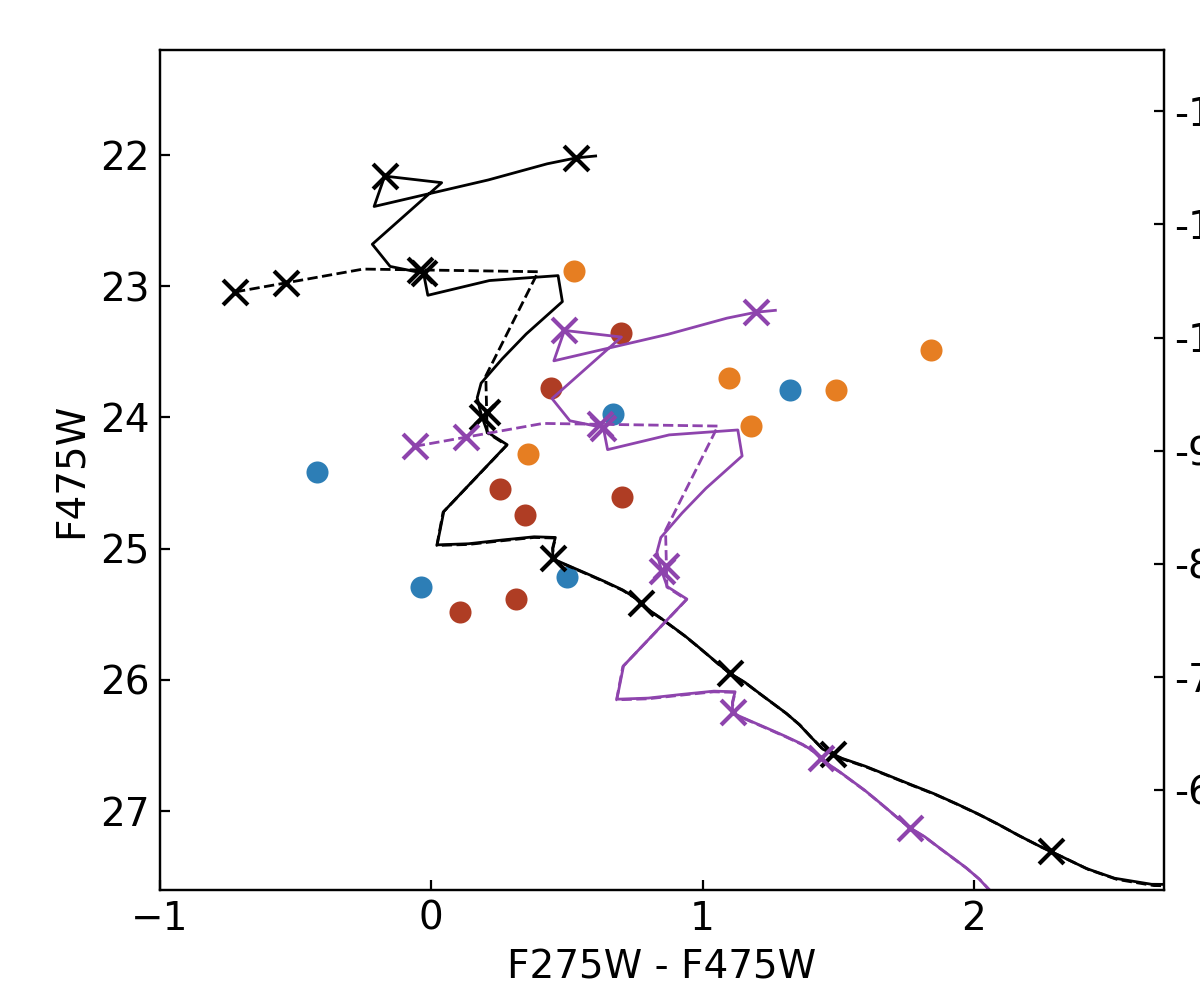

In [42]:
fig, ax = plt.subplots(figsize=(6,5))
yrs4Ann = 1e6*np.array([1, 3, 5, 10, 30, 50, 100, 200, 500, 1000])
yrs4Ann_2 = 1e6*np.array([1, 3, 5, 10])

# Get XY
# Get the XY Values
x_new, xExt_new = mag[275] - mag[475], magExt[275] - magExt[475]
y_new, yExt_new = mag[475], magExt[475]

# Plot the Tracks
_ = ax.plot(x, y+5, linewidth=1, linestyle='--',color='k', zorder=1)
_ = ax.plot(xExt, yExt+5, linewidth=1, linestyle='--',color='#8E44AD', zorder=2)
_ = ax.plot(x_new, y_new+5, linewidth=1,color='k',label='E(B-V) = 0.00', zorder=1)
_ = ax.plot(xExt_new, yExt_new+5, linewidth=1, color='#8E44AD',label='E(B-V) = {:.2f}'.format(ebv), zorder=2)

# Annotate Line with Years
# Plot the Non-Extinction Markers
xAnn_new, yAnn_new = np.interp(yrs4Ann, data['Years'], x_new), np.interp(yrs4Ann, data['Years'], y_new)
_ = ax.scatter(xAnn_new, yAnn_new+5, s=80, c='k', marker='x', zorder=3)
xAnn, yAnn = np.interp(yrs4Ann_2, sb99.years, x), np.interp(yrs4Ann_2, sb99.years, y)
_ = ax.scatter(xAnn, yAnn+5, s=80, c='k', marker='x', zorder=3)


# Plot the Extinction Markers
xAnn_new, yAnn_new = np.interp(yrs4Ann, data['Years'], xExt_new), np.interp(yrs4Ann, data['Years'], yExt_new)
_ = ax.scatter(xAnn_new, yAnn_new+5, s=80, c='#8E44AD', marker='x', zorder=4)

xAnn, yAnn = np.interp(yrs4Ann_2, sb99.years, xExt), np.interp(yrs4Ann_2, sb99.years, yExt)
_ = ax.scatter(xAnn, yAnn+5, s=80, c='#8E44AD', marker='x', zorder=4)


plt.subplots_adjust(left=0.110, bottom=0.110, right=0.990, top=0.940,
                wspace=0.2, hspace=0.2)

# Labels
_ = ax.scatter(ma2_a -ma4_a,ma4_a, label='a' , color='#AF3D24', s=80,marker='o',edgecolor='w')
_ = ax.scatter(ma2_b -ma4_b,ma4_b, label='b' , color='#E67E22', s=80,marker='o',edgecolor='w')
_ = ax.scatter(ma2_rem -ma4_rem,ma4_rem, label='others' , color='#2D7EB6', s=80,marker='o',edgecolor='w')

_ = ax.scatter(md2_a -md4_a,md4_a,color='#AF3D24',s=80,marker='o',edgecolor='w')
_ = ax.scatter(md2_b -md4_b,md4_b, color='#E67E22',s=80,marker='o',edgecolor='w')
_ = ax.scatter(md2_rem -md4_rem,md4_rem, color='#2D7EB6',s=80,marker='o',edgecolor='w')
_ = ax.set_xlabel('F275W - F475W')
_ = ax.set_ylabel('F475W')

axT = ax.twinx()
yT = ax.get_yticks()
yT +=0.213
axT.set_yticks(yT)
yTabs =yT - 5*np.log10(69.6e5)
yTabs = list(map('{:.0f}'.format, yTabs))
axT.set_yticklabels(yTabs)
axT.set_ylim(ax.get_ylim())
#axT.set_ylabel('M$_{F475W}$')
axT.tick_params(axis='both',direction='in')
axT.invert_yaxis()


_ = ax.axis([-1,2.7,27.6, 21.2])
plt.subplots_adjust(left=0.133, bottom=0.110, right=0.97, top=0.95,

                    wspace=0.2, hspace=0.2)

_ = ax.set_xticks([-1,0,1,2])

ax.tick_params(axis='both',direction='in')
#plt.savefig('/Users/sunil/Desktop/young_star_cluster_3.eps',dpi=300)